In [2]:
"""""
References:
    https://gtraskas.github.io/post/ex7/
"""""

'""\nReferences:\n    https://gtraskas.github.io/post/ex7/\n'

In [3]:
import numpy as np
import pandas as pd
import sklearn
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from datetime import datetime, date
import copy
import math

In [4]:
df = pd.read_csv('marketing_campaign_dataset.csv')
df

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntFruits,MntMeatProducts,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
0,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,88,546,...,10,4,7,0,0,0,0,0,0,1
1,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,1,6,...,1,2,5,0,0,0,0,0,0,0
2,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,49,127,...,2,10,4,0,0,0,0,0,0,0
3,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,4,20,...,0,4,6,0,0,0,0,0,0,0
4,1981,PhD,Married,58293.0,1,0,19-01-2014,94,43,118,...,3,6,5,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2211,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,43,182,...,3,4,5,0,0,0,0,0,0,0
2212,1946,PhD,Together,64014.0,2,1,10-06-2014,56,0,30,...,2,5,7,0,0,0,1,0,0,0
2213,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,48,217,...,3,13,6,0,1,0,0,0,0,0
2214,1956,Master,Together,69245.0,0,1,24-01-2014,8,30,214,...,5,10,3,0,0,0,0,0,0,0


In [5]:
dummy_columns = ['Education', 'Marital_Status']
for dummy in dummy_columns:
    dummies = pd.get_dummies(df[dummy], drop_first = True).astype(int)
    df = pd.concat([df, dummies], axis = 1)
    df = df.drop([dummy], axis = 1)
df

,Year_Birth,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,Graduation,Master,PhD,Alone,Divorced,Married,Single,Together,Widow,YOLO
0,1957,58138.0,0,0,04-09-2012,58,88,546,172,88,...,1,0,0,0,0,0,1,0,0,0
1,1954,46344.0,1,1,08-03-2014,38,1,6,2,1,...,1,0,0,0,0,0,1,0,0,0
2,1965,71613.0,0,0,21-08-2013,26,49,127,111,21,...,1,0,0,0,0,0,0,1,0,0
3,1984,26646.0,1,0,10-02-2014,26,4,20,10,3,...,1,0,0,0,0,0,0,1,0,0
4,1981,58293.0,1,0,19-01-2014,94,43,118,46,27,...,0,0,1,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2211,1967,61223.0,0,1,13-06-2013,46,43,182,42,118,...,1,0,0,0,0,1,0,0,0,0
2212,1946,64014.0,2,1,10-06-2014,56,0,30,0,0,...,0,0,1,0,0,0,0,1,0,0
2213,1981,56981.0,0,0,25-01-2014,91,48,217,32,12,...,1,0,0,0,1,0,0,0,0,0
2214,1956,69245.0,0,1,24-01-2014,8,30,214,80,30,...,0,1,0,0,0,0,0,1,0,0


In [6]:
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], format = '%d-%m-%Y')
refrence_date = datetime.now().date().strftime("%d-%m-%Y")
df['Dt_Customer'] = (pd.Timestamp(refrence_date) - df['Dt_Customer']).dt.days
df

,Year_Birth,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,Graduation,Master,PhD,Alone,Divorced,Married,Single,Together,Widow,YOLO
0,1957,58138.0,0,0,4090,58,88,546,172,88,...,1,0,0,0,0,0,1,0,0,0
1,1954,46344.0,1,1,3540,38,1,6,2,1,...,1,0,0,0,0,0,1,0,0,0
2,1965,71613.0,0,0,3739,26,49,127,111,21,...,1,0,0,0,0,0,0,1,0,0
3,1984,26646.0,1,0,3566,26,4,20,10,3,...,1,0,0,0,0,0,0,1,0,0
4,1981,58293.0,1,0,3588,94,43,118,46,27,...,0,0,1,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2211,1967,61223.0,0,1,3808,46,43,182,42,118,...,1,0,0,0,0,1,0,0,0,0
2212,1946,64014.0,2,1,3446,56,0,30,0,0,...,0,0,1,0,0,0,0,1,0,0
2213,1981,56981.0,0,0,3582,91,48,217,32,12,...,1,0,0,0,1,0,0,0,0,0
2214,1956,69245.0,0,1,3583,8,30,214,80,30,...,0,1,0,0,0,0,0,1,0,0


In [7]:
scaler = StandardScaler()
df_scaler = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)
df_scaler

,Year_Birth,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,Graduation,Master,PhD,Alone,Divorced,Married,Single,Together,Widow,YOLO
0,-0.986443,0.234063,-0.823039,-0.928972,1.529129,0.310532,1.549429,1.690227,2.454568,1.484827,...,0.992806,-0.444062,-0.526530,-0.036819,-0.341958,-0.794110,1.924807,-0.590553,-0.188452,-0.030056
1,-1.236801,-0.234559,1.039938,0.909066,-1.188411,-0.380509,-0.637328,-0.717986,-0.651038,-0.633880,...,0.992806,-0.444062,-0.526530,-0.036819,-0.341958,-0.794110,1.924807,-0.590553,-0.188452,-0.030056
2,-0.318822,0.769478,-0.823039,-0.928972,-0.205155,-0.795134,0.569159,-0.178368,1.340203,-0.146821,...,0.992806,-0.444062,-0.526530,-0.036819,-0.341958,-0.794110,-0.519533,1.693329,-0.188452,-0.030056
3,1.266777,-1.017239,1.039938,-0.928972,-1.059945,-0.795134,-0.561922,-0.655551,-0.504892,-0.585174,...,0.992806,-0.444062,-0.526530,-0.036819,-0.341958,-0.794110,-0.519533,1.693329,-0.188452,-0.030056
4,1.016420,0.240221,1.039938,-0.928972,-0.951244,1.554407,0.418348,-0.218505,0.152766,-0.000703,...,-1.007246,-0.444062,1.899228,-0.036819,-0.341958,1.259271,-0.519533,-0.590553,-0.188452,-0.030056
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2211,-0.151917,0.356642,-0.823039,0.909066,0.135772,-0.104093,0.418348,0.066913,0.079693,2.215416,...,0.992806,-0.444062,-0.526530,-0.036819,-0.341958,1.259271,-0.519533,-0.590553,-0.188452,-0.030056
2212,-1.904422,0.467539,2.902916,0.909066,-1.652863,0.241428,-0.662463,-0.610954,-0.687574,-0.658233,...,-1.007246,-0.444062,1.899228,-0.036819,-0.341958,-0.794110,-0.519533,1.693329,-0.188452,-0.030056
2213,1.016420,0.188091,-0.823039,-0.928972,-0.980889,1.450751,0.544024,0.223001,-0.102990,-0.365998,...,0.992806,-0.444062,-0.526530,-0.036819,2.924333,-0.794110,-0.519533,-0.590553,-0.188452,-0.030056
2214,-1.069896,0.675388,-0.823039,0.909066,-0.975948,-1.417072,0.091591,0.209622,0.773887,0.072356,...,-1.007246,2.251940,-0.526530,-0.036819,-0.341958,-0.794110,-0.519533,1.693329,-0.188452,-0.030056


In [8]:
X = df.values
print(X.shape)

(2216, 34)


In [9]:
def closest_centroid(X, centroids):
    """
    Computes the centroid memberships for every example

    Args:
        X (ndarray): (m, n) Input values
        centroids (ndarray): (K, n) centroids

    Returns:
        idx (array_like): (m,) closest centroids

    """
    idx = np.zeros(X.shape[0], dtype = int)

    for i in range(X.shape[0]):
        min_distance = math.inf
        cluster = -1
        for j in range(centroids.shape[0]):
            L2_norm = np.linalg.norm(X[i] - centroids[j])
            if L2_norm < min_distance:
                min_distance = L2_norm
                cluster = j
        idx[i] = cluster

    return idx

In [10]:
def compute_centroids(X, idx, K):
    """
    Returns the new centroids by computing the means of the
    data points assigned to each centroid.

    Args:
        X (ndarray):   (m, n) Data points
        idx (ndarray): (m,) Array containing index of closest centroid for each
                       example in X. Concretely, idx[i] contains the index of
                       the centroid closest to example i
        K (int):       number of centroids

    Returns:
        centroids (ndarray): (K, n) New centroids computed
    """
    centroids = np.zeros((K, X.shape[1]))

    for k in range(K):
        points_cluster_k = X[idx == k]
        centroids[k] = np.mean(points_cluster_k, axis=0)

    return centroids

In [11]:
def plotDataPoints(X, idx, K):
    """
    Plots data points in X, coloring them so that those
    with the same index assignments in idx have the same color
    Args:
        X  : array(# training examples, 2)
        idx: array(# training examples, 1)
        K  : int, # of centroids
    """
    # Create a colors list.
    colors = [plt.cm.tab20(float(i) / 10) for i in idx]

    # Plot the data.
    plt.scatter(X[:,0], X[:,1], c=colors, alpha=0.5, s=2)

In [12]:
def plotProgresskMeans(X, centroids, previous, idx, K, i):
    """
    Plots the data points with colors assigned to each centroid.
    With the previous centroids, it also plots a line between the
    previous locations and current locations of the centroids.
    Args:
        X        : array(# training examples, n)
        centroids: array(# of centroids, n)
        previous : array(# of centroids, n)
        idx      : array(# training examples, 1)
        K        : int, # of centroids
        i        : # of iterations
    """
    # Plot the examples.
    plotDataPoints(X, idx, K)

    # Plot the centroids as black x's.
    plt.scatter(centroids[:,0], centroids[:,1],
                marker='x', c='k', s=100, linewidth=1)

    # Plot the history of the centroids with lines.
    for j in range(centroids.shape[0]):
        plt.plot([centroids[j, :][0], previous[j, :][0]],
                 [centroids[j, :][1], previous[j, :][1]], c='k')
    # Title
    plt.title('Iteration number {:d}'.format(i+1))

In [13]:
def k_means(X, initial_centroids, num_iterations, plot_progress):

    m, n = X.shape
    K = initial_centroids.shape[0]
    centroids = copy.deepcopy(initial_centroids)
    previous_centroids = centroids
    idx = np.ndarray((m,))

    plt.ion()
    for i in range(num_iterations):
        idx = closest_centroid(X, centroids)

        if plot_progress:
            plotProgresskMeans(X, centroids, previous_centroids, idx, K, i)
            previous_centroids = centroids

        centroids = compute_centroids(X, idx, K)

    return idx, centroids

In [14]:
def kMeans_init_centroids(X, K):
    """
    This function initializes K centroids that are to be
    used in K-Means on the dataset X

    Args:
        X (ndarray): Data points
        K (int):     number of centroids/clusters

    Returns:
        centroids (ndarray): Initialized centroids
    """

    randidx = np.random.permutation(X.shape[0])
    centroids = X[randidx[:K]]

    return centroids

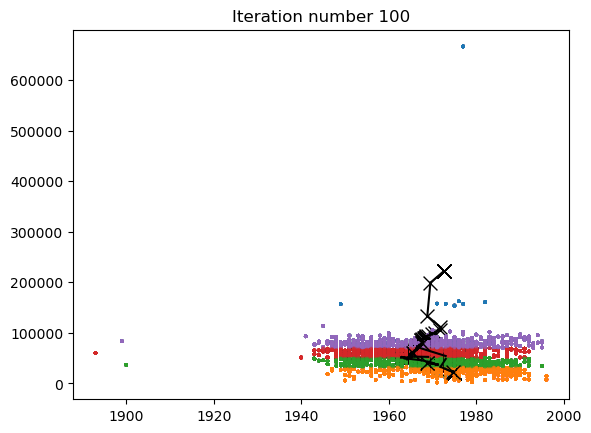

In [18]:
K = 5
initial_centroids = kMeans_init_centroids(X, K)

max_iterations = 100

idx, centroids = k_means(X, initial_centroids, max_iterations, True)

In [16]:
test = 4
result_test = X[idx == test]

scaler = StandardScaler()
scaler.fit(df)
result_test_actual = scaler.inverse_transform(result_test)
print(result_test_actual[0:5])

[[2.55151196e+04 1.80236499e+09 4.41787004e-01 5.05415162e-01
  7.60512942e+05 8.01499936e+02 1.97581795e+03 2.86445440e+04
  6.11374736e+03 8.89347208e+02 2.21972157e+03 4.24683750e+00
  2.60079493e+01 8.52317528e+00 3.83015050e+01 1.50182883e+01
  7.35559567e-02 7.40072202e-02 7.31046931e-02 6.40794224e-02
  1.35379061e-02 9.47653430e-03 1.50270758e-01 2.43682310e-02
  1.00359708e+00 1.64711191e-01 2.17057762e-01 1.35379061e-03
  1.04693141e-01 3.86732852e-01 2.12545126e-01 6.96424998e-01
  3.42960289e-02 9.02527076e-04]
 [2.52874455e+04 2.08391265e+09 4.41787004e-01 5.05415162e-01
  8.15157968e+05 7.14674478e+02 9.01624655e+02 2.59537520e+04
  3.26728154e+03 2.81929775e+03 2.37513274e+03 4.24683750e+00
  2.32676168e+01 2.02274681e+01 4.48016075e+01 1.25934770e+01
  7.35559567e-02 7.40072202e-02 3.33412966e-01 3.08973787e-01
  1.35379061e-02 9.47653430e-03 5.07607374e-01 2.43682310e-02
  5.03610108e-01 1.64711191e-01 6.29300032e-01 1.35379061e-03
  1.04693141e-01 3.86732852e-01 6.216